In [175]:
# import required packages
import Pkg
Pkg.add("JuMP")
Pkg.add("Ipopt")
Pkg.add("Plots")

   Resolving package versions...
  No Changes to `C:\Users\Gavin\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\Gavin\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Gavin\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\Gavin\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
   Installed Libmount_jll ───────────────── v2.35.0+0
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed GR_jll ─────────────────────── v0.69.1+0
   Installed JpegTurbo_jll ──────────────── v2.1.2+0
   Installed libfdk_aac_jll ─────────────── v2.0.2+0
   Installed LERC_jll ───────────────────── v3.0.0+1
   Installed Opus_jll ───────────────────── v1.3.2+0
   Installed LoggingExtras ──────────────── v0.4.9
   Installed Xorg_xkbcomp_jll ───────────── v1.4.2+4
   Installed RelocatableFolders ─────────── v1.0.0
   Installed Measures ───────────────────── v0.3.1
   Installed Xorg_xcb_util_wm_jll ──

  [d1d4a3ce] + BitFlags v0.1.5
  [35d6a980] + ColorSchemes v3.19.0
  [3da002f7] + ColorTypes v0.11.4
  [c3611d14] + ColorVectorSpace v0.9.9
  [5ae59095] + Colors v0.12.8
  [d38c429a] + Contour v0.6.2
  [9a962f9c] + DataAPI v1.12.0
  [c87230d0] + FFMPEG v0.4.1
  [53c48c17] + FixedPointNumbers v0.8.4
  [59287772] + Formatting v0.4.2
  [28b8d3ca] + GR v0.69.5
  [42e2da0e] + Grisu v1.0.2
  [cd3eb016] + HTTP v1.5.1
  [83e8ac13] + IniFile v0.5.1
  [1019f520] + JLFzf v0.1.5
  [b964fa9f] + LaTeXStrings v1.3.0
  [23fbe1c1] + Latexify v0.15.17
  [e6f89c97] + LoggingExtras v0.4.9
  [442fdcdd] + Measures v0.3.1
  [e1d29d7a] + Missings v1.0.2
  [4d8831e6] + OpenSSL v1.3.0
  [b98c9c47] + Pipe v1.3.0
  [ccf2f8ad] + PlotThemes v3.1.0
  [995b91a9] + PlotUtils v1.3.1
  [91a5bcdd] + Plots v1.35.6
  [3cdcf5f2] + RecipesBase v1.3.1
  [01d81517] + RecipesPipeline v0.6.8
  [189a3867] + Reexport v1.2.2
  [05181044] + RelocatableFolders v1.0.0
  [ae029012] + Requires v1.3.0
  [6c6a2e73] + Scratch v1.1.1
  [992

  ✓ Missings
  ✓ RecipesBase
  ✓ JLFzf
  ✓ libvorbis_jll
  ✓ Libtiff_jll
  ✓ OpenSSL
  ✓ XML2_jll
  ✓ Libgcrypt_jll
  ✓ Fontconfig_jll
  ✓ Latexify
  ✓ Wayland_jll
  ✓ Gettext_jll
  ✓ ColorTypes
  ✓ XSLT_jll
  ✓ Glib_jll
  ✓ Xorg_libxcb_jll
  ✓ StatsBase
  ✓ Xorg_xcb_util_jll
  ✓ Xorg_libX11_jll
  ✓ Xorg_xcb_util_image_jll
  ✓ Xorg_xcb_util_renderutil_jll
  ✓ Xorg_xcb_util_keysyms_jll
  ✓ Xorg_xcb_util_wm_jll
  ✓ HTTP
  ✓ Xorg_libXext_jll
  ✓ Xorg_libXrender_jll
  ✓ ColorVectorSpace
  ✓ Xorg_libxkbfile_jll
  ✓ Xorg_libXfixes_jll
  ✓ Libglvnd_jll
  ✓ Xorg_libXinerama_jll
  ✓ Xorg_libXrandr_jll
  ✓ Xorg_libXcursor_jll
  ✓ Xorg_xkbcomp_jll
  ✓ Cairo_jll
  ✓ Xorg_libXi_jll
  ✓ Colors
  ✓ Xorg_xkeyboard_config_jll
  ✓ HarfBuzz_jll
  ✓ GLFW_jll
  ✓ xkbcommon_jll
  ✓ libass_jll
  ✓ Qt5Base_jll
  ✓ FFMPEG_jll
  ✓ FFMPEG
  ✓ GR_jll
  ✓ GR
  ✓ ColorSchemes
  ✓ PlotUtils
  ✓ RecipesPipeline
  ✓ PlotThemes
  ✓ Plots
  106 dependencies successfully precompiled in 69 seconds. 52 already precompiled.

In [176]:
using JuMP
using Ipopt
using Plots

In [19]:
# Q1
# Define probability, return & weight vectors
p=[0.6, 0.3, 0.1]
R=[1,2,4]

3-element Vector{Int64}:
 1
 1
 1

In [38]:
# Maximize expected log wealth,
# assuming we are unable to "short" non-optimal bets
OG=Model(Ipopt.Optimizer)
@variable(OG,w[1:3]>=0)
@NLobjective(OG,Max,p[1]*log(1+w[1]*R[1]-w[2]-w[3])+.3*log(1-w[1]+w[2]*R[2]-w[3])+.1*log(1-w[1]-w[2]+w[3]*R[3]))
solution=optimize!(OG)

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        3
                     variables with only lower bounds:        3
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -4.0499347e-03 0.00e+00 1.21e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

In [53]:
# Optimal weight vector
round.(value.(w),digits=4)

3-element Vector{Float64}:
 0.3
 0.1
 0.0

In [41]:
# Optimal expected wealth after bet
exp(objective_value(OG))

1.027061915296838

In [75]:
# Q2
# Set up return vectors for each bet
R1 = [R[1],-1,-1]
R2 = [-1,R[2],-1]
R3 = [-1,-1,R[3]]

# Expected Return calculated as E[X]
ER1=sum(p.*R1)
ER2=sum(p.*R2)
ER3=sum(p.*R3)

round.([ER1 ER2 ER3], digits=4)

1×3 Matrix{Float64}:
 0.2  -0.1  -0.5

In [81]:
# Q3
# Variances calculated as E[(X-mu)^2]
round.([sum(p.*((R1.-ER1).^2)) sum(p.*((R2.-ER2).^2)) sum(p.*((R3.-ER3).^2))],digits=2)

1×3 Matrix{Float64}:
 0.96  1.89  2.25

In [87]:
# Covariances calculated as E[(x_i-mu_i)(X_j-mu_j)]
round.([sum(p.*(R1.-ER1).*(R2.-ER2)) sum(p.*(R1.-ER1).*(R3.-ER3)) sum(p.*(R2.-ER2).*(R3.-ER3))], digits=2)

1×3 Matrix{Float64}:
 -1.08  -0.6  -0.45

In [89]:
# Q4
var = round.([sum(p.*((R1.-ER1).^2)) sum(p.*((R2.-ER2).^2)) sum(p.*((R3.-ER3).^2))],digits=2)
covar = round.([sum(p.*(R1.-ER1).*(R2.-ER2)) sum(p.*(R1.-ER1).*(R3.-ER3)) sum(p.*(R2.-ER2).*(R3.-ER3))], digits=2)

1×3 Matrix{Float64}:
 -1.08  -0.6  -0.45

In [94]:
# Minimize portfolio variance
MVP=Model(Ipopt.Optimizer)
@variable(MVP,h[1:3]>=0)
# Add constraint that holdings sum to one to prevent 0 holding portfolio & get percentages instead
@constraint(MVP, h[1]+h[2]+h[3]==1)
@NLobjective(MVP,Min,h[1]^2*var[1]+h[2]^2*var[2]+h[3]*var[3]+2*h[1]*h[2]*covar[1]+2*h[1]*h[3]*covar[2]+2*h[2]h[3]*covar[3])
solution=optimize!(MVP)

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        3
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        3
                     variables with only lower bounds:        3
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  2.2358978e-02 9.70e-01 1.49e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

In [96]:
# Optimal holding vector
round.(value.(h),digits=4)

3-element Vector{Float64}:
  0.5928
  0.4072
 -0.0

In [98]:
objective_value(MVP)

0.1293413107756158

In [142]:
# Q5
# Minimize portfolio variance with ER=-0.5
MVP=Model(Ipopt.Optimizer)
@variable(MVP,h[1:3]>=0)
@constraint(MVP, h[1]+h[2]+h[3]==1)
@constraint(MVP, h[1]*ER1+h[2]*ER2+h[3]*ER3==-0.5)
@NLobjective(MVP,Min,h[1]^2*var[1]+h[2]^2*var[2]+h[3]*var[3]+2*h[1]*h[2]*covar[1]+2*h[1]*h[3]*covar[2]+2*h[2]h[3]*covar[3])
solution=optimize!(MVP)

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        6
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        3
                     variables with only lower bounds:        3
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  2.2358978e-02 9.70e-01 6.22e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

In [143]:
# Optimal holding vector
round.(value.(h),digits=4)

3-element Vector{Float64}:
 -0.0
  0.0
  1.0

In [144]:
SD1 = round(sqrt(objective_value(MVP)), digits=4)
Mean1 = round.([ER1 ER2 ER3]*value.(h),digits=4)

1-element Vector{Float64}:
 -0.5

In [145]:
# Minimize portfolio variance with ER=-0.4
MVP=Model(Ipopt.Optimizer)
@variable(MVP,h[1:3]>=0)
@constraint(MVP, h[1]+h[2]+h[3]==1)
@constraint(MVP, h[1]*ER1+h[2]*ER2+h[3]*ER3==-0.4)
@NLobjective(MVP,Min,h[1]^2*var[1]+h[2]^2*var[2]+h[3]*var[3]+2*h[1]*h[2]*covar[1]+2*h[1]*h[3]*covar[2]+2*h[2]h[3]*covar[3])
solution=optimize!(MVP)

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        6
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        3
                     variables with only lower bounds:        3
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  2.2358978e-02 9.70e-01 6.22e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

In [146]:
# Optimal holding vector
round.(value.(h),digits=4)

3-element Vector{Float64}:
 0.0182
 0.2181
 0.7637

In [147]:
SD2 = round(sqrt(objective_value(MVP)), digits=4)
Mean2 = round.([ER1 ER2 ER3]*value.(h),digits=4)

1-element Vector{Float64}:
 -0.4

In [148]:
# Minimize portfolio variance with ER=-0.3
MVP=Model(Ipopt.Optimizer)
@variable(MVP,h[1:3]>=0)
@constraint(MVP, h[1]+h[2]+h[3]==1)
@constraint(MVP, h[1]*ER1+h[2]*ER2+h[3]*ER3==-0.3)
@NLobjective(MVP,Min,h[1]^2*var[1]+h[2]^2*var[2]+h[3]*var[3]+2*h[1]*h[2]*covar[1]+2*h[1]*h[3]*covar[2]+2*h[2]h[3]*covar[3])
solution=optimize!(MVP)

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        6
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        3
                     variables with only lower bounds:        3
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  2.2358978e-02 9.70e-01 6.22e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

In [149]:
# Optimal holding vector
round.(value.(h),digits=4)

3-element Vector{Float64}:
 0.1318
 0.2693
 0.5989

In [150]:
SD3 = round(sqrt(objective_value(MVP)), digits=4)
Mean3 = round.([ER1 ER2 ER3]*value.(h),digits=4)

1-element Vector{Float64}:
 -0.3

In [151]:
# Minimize portfolio variance with ER=-0.2
MVP=Model(Ipopt.Optimizer)
@variable(MVP,h[1:3]>=0)
@constraint(MVP, h[1]+h[2]+h[3]==1)
@constraint(MVP, h[1]*ER1+h[2]*ER2+h[3]*ER3==-0.2)
@NLobjective(MVP,Min,h[1]^2*var[1]+h[2]^2*var[2]+h[3]*var[3]+2*h[1]*h[2]*covar[1]+2*h[1]*h[3]*covar[2]+2*h[2]h[3]*covar[3])
solution=optimize!(MVP)

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        6
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        3
                     variables with only lower bounds:        3
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  2.2358978e-02 9.70e-01 6.22e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

In [152]:
# Optimal holding vector
round.(value.(h),digits=4)

3-element Vector{Float64}:
 0.2454
 0.3205
 0.4341

In [153]:
SD4 = round(sqrt(objective_value(MVP)), digits=4)
Mean4 = round.([ER1 ER2 ER3]*value.(h),digits=4)

1-element Vector{Float64}:
 -0.2

In [154]:
# Minimize portfolio variance with ER=-0.1
MVP=Model(Ipopt.Optimizer)
@variable(MVP,h[1:3]>=0)
@constraint(MVP, h[1]+h[2]+h[3]==1)
@constraint(MVP, h[1]*ER1+h[2]*ER2+h[3]*ER3==-0.1)
@NLobjective(MVP,Min,h[1]^2*var[1]+h[2]^2*var[2]+h[3]*var[3]+2*h[1]*h[2]*covar[1]+2*h[1]*h[3]*covar[2]+2*h[2]h[3]*covar[3])
solution=optimize!(MVP)

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        6
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        3
                     variables with only lower bounds:        3
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  2.2358978e-02 9.70e-01 6.22e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

In [155]:
# Optimal holding vector
round.(value.(h),digits=4)

3-element Vector{Float64}:
 0.3591
 0.3716
 0.2693

In [156]:
SD5 = round(sqrt(objective_value(MVP)), digits=4)
Mean5 = round.([ER1 ER2 ER3]*value.(h),digits=4)

1-element Vector{Float64}:
 -0.1

In [157]:
# Minimize portfolio variance with ER=0
MVP=Model(Ipopt.Optimizer)
@variable(MVP,h[1:3]>=0)
@constraint(MVP, h[1]+h[2]+h[3]==1)
@constraint(MVP, h[1]*ER1+h[2]*ER2+h[3]*ER3==0)
@NLobjective(MVP,Min,h[1]^2*var[1]+h[2]^2*var[2]+h[3]*var[3]+2*h[1]*h[2]*covar[1]+2*h[1]*h[3]*covar[2]+2*h[2]h[3]*covar[3])
solution=optimize!(MVP)

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        6
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        3
                     variables with only lower bounds:        3
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  2.2358978e-02 9.70e-01 6.22e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

In [158]:
# Optimal holding vector
round.(value.(h),digits=4)

3-element Vector{Float64}:
 0.4727
 0.4228
 0.1045

In [159]:
SD6 = round(sqrt(objective_value(MVP)), digits=4)
Mean6 = round.([ER1 ER2 ER3]*value.(h),digits=4)

1-element Vector{Float64}:
 0.0

In [160]:
# Minimize portfolio variance with ER=0.1
MVP=Model(Ipopt.Optimizer)
@variable(MVP,h[1:3]>=0)
@constraint(MVP, h[1]+h[2]+h[3]==1)
@constraint(MVP, h[1]*ER1+h[2]*ER2+h[3]*ER3==0.1)
@NLobjective(MVP,Min,h[1]^2*var[1]+h[2]^2*var[2]+h[3]*var[3]+2*h[1]*h[2]*covar[1]+2*h[1]*h[3]*covar[2]+2*h[2]h[3]*covar[3])
solution=optimize!(MVP)

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        6
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        3
                     variables with only lower bounds:        3
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  2.2358978e-02 9.70e-01 6.22e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

In [161]:
# Optimal holding vector
round.(value.(h),digits=4)

3-element Vector{Float64}:
  0.6667
  0.3333
 -0.0

In [162]:
SD7 = round(sqrt(objective_value(MVP)), digits=4)
Mean7 = round.([ER1 ER2 ER3]*value.(h),digits=4)

1-element Vector{Float64}:
 0.1

In [163]:
# Minimize portfolio variance with ER=0.2
MVP=Model(Ipopt.Optimizer)
@variable(MVP,h[1:3]>=0)
@constraint(MVP, h[1]+h[2]+h[3]==1)
@constraint(MVP, h[1]*ER1+h[2]*ER2+h[3]*ER3==0.2)
@NLobjective(MVP,Min,h[1]^2*var[1]+h[2]^2*var[2]+h[3]*var[3]+2*h[1]*h[2]*covar[1]+2*h[1]*h[3]*covar[2]+2*h[2]h[3]*covar[3])
solution=optimize!(MVP)

This is Ipopt version 3.14.4, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:        6
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        3
                     variables with only lower bounds:        3
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  2.2358978e-02 9.70e-01 6.22e-01  -1.0 0.00e+00    -  0.00e+00 0.00e+00  

In [164]:
# Optimal holding vector
round.(value.(h),digits=4)

3-element Vector{Float64}:
  1.0
  0.0
 -0.0

In [165]:
SD8 = round(sqrt(objective_value(MVP)), digits=4)
Mean8 = round.([ER1 ER2 ER3]*value.(h),digits=4)

1-element Vector{Float64}:
 0.2

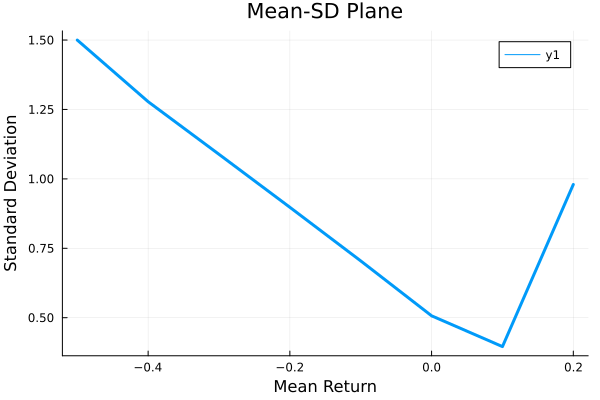

In [186]:
plt = [Mean1 SD1;
        Mean2 SD2;
        Mean3 SD3;
        Mean4 SD4;
        Mean5 SD5;
        Mean6 SD6;
        Mean7 SD7;
        Mean8 SD8]
display(plot(plt[:,1], plt[:,2], title="Mean-SD Plane",xlabel="Mean Return",ylabel="Standard Deviation", lw=2))